In [1]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Data
df = pd.read_csv('https://raw.githubusercontent.com/samato0624/DATA602/main/Accidental_Drug_Related_Deaths_2012-2022.csv')

**Research Question:**

Which drug caused the greatest number of overdoses by year between 2012 and 2022? Can this data be used to predict the future trends in overdose related deaths past 2022?

In [3]:
#Data wrangling and cleaning

#Choosing columns that may be relevant to the research question.
#Drugs that were excluded had less than 500 ODs.
columns_to_keep = ["Date", "Date Type", "Age", "Sex", "Race", "Ethnicity", "Location",
                   "Location if Other", "Heroin", "Cocaine", "Fentanyl", "Oxycodone",
                   "Ethanol", "Methadone", "Benzodiazepine", "Xylazine"]

#Select columns by name
df_columns = df.filter(columns_to_keep)

#Select only the drugs of interest
columns_to_change = ["Heroin", "Cocaine", "Fentanyl", "Oxycodone", "Methadone", "Ethanol", "Benzodiazepine", "Xylazine"]

for x in columns_to_change:
  #Replace NaN with 0.
  df_columns[x].fillna(0, inplace=True)

  #Create a Boolean mask
  mask = df_columns[x] != 0

  #Replace values based on the mask
  df_columns.loc[mask, x] = 1

#Determine the number of drugs taken by the user, from the drugs of interest
df_columns['Number of Drugs Taken'] = df_columns[columns_to_change].sum(axis=1)
df_rows = df_columns[df_columns['Number of Drugs Taken'] != 0]

#Create a new column with the year extracted from date
df_rows['Date'] = pd.to_datetime(df_rows['Date'])
df_rows['Year'] = df_rows['Date'].dt.year

df_rows.head()

<ipython-input-3-b8778de6f48a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rows['Date'] = pd.to_datetime(df_rows['Date'])
<ipython-input-3-b8778de6f48a>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rows['Year'] = df_rows['Date'].dt.year


,Date,Date Type,Age,Sex,Race,Ethnicity,Location,Location if Other,Heroin,Cocaine,Fentanyl,Oxycodone,Ethanol,Methadone,Benzodiazepine,Xylazine,Number of Drugs Taken,Year
0,2012-05-29,Date of death,37.0,Male,Black,NaN,Residence,NaN,0,1,0,0,0,0,0,0,1,2012
1,2012-06-27,Date of death,37.0,Male,White,NaN,Hospital,NaN,1,0,0,0,0,0,0,0,1,2012
2,2014-03-24,Date of death,28.0,Male,White,NaN,Hospital,NaN,1,0,0,0,0,0,0,0,1,2014
3,2014-12-31,Date of death,26.0,Female,White,NaN,Residence,NaN,1,0,0,0,0,0,0,0,1,2014
4,2016-01-16,Date of death,41.0,Male,White,NaN,Hospital,NaN,0,0,1,0,0,0,0,0,1,2016


**Exploratory Data Analysis**

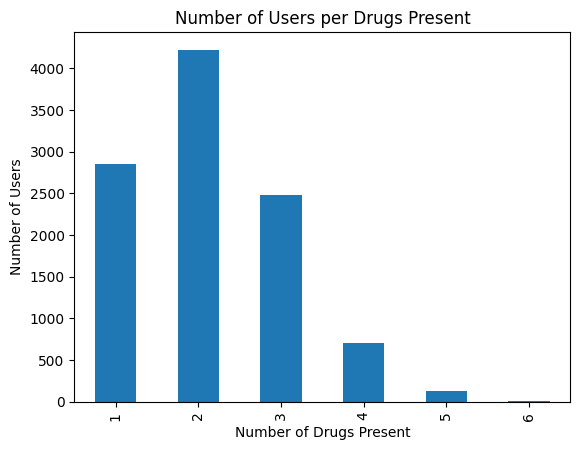

In [4]:
#Bar chart of number of ODs per number of different drugs taken.
drug_counts = df_rows['Number of Drugs Taken'].value_counts()
order = [1, 2, 3, 4, 5, 6]
drug_counts = drug_counts.reindex(order)
drug_counts.plot(kind='bar')
plt.xlabel('Number of Drugs Present')
plt.ylabel('Number of Users')
plt.title('Number of Users per Drugs Present')
plt.show()

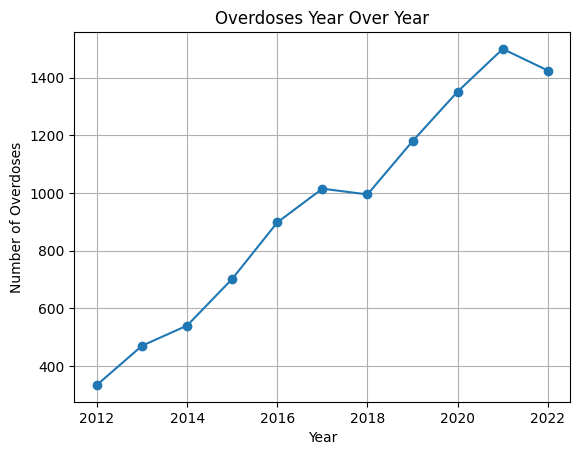

In [5]:
# Count the number of overdoses for each year
overdoses_by_year = df_rows['Year'].value_counts().sort_index()

# Plotting
plt.plot(overdoses_by_year.index, overdoses_by_year.values, marker='o')
plt.title('Overdoses Year Over Year')
plt.xlabel('Year')
plt.ylabel('Number of Overdoses')
plt.grid(True)
plt.show()

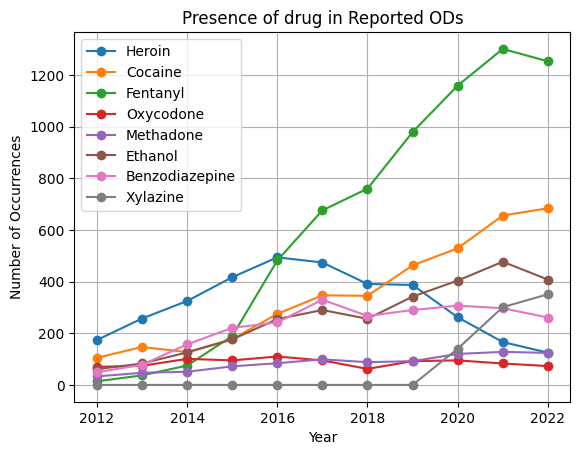

,Year,Heroin,Cocaine,Fentanyl,Oxycodone,Methadone,Ethanol,Benzodiazepine,Xylazine
0,2012,174,105,14,70,33,61,49,0
1,2013,257,147,37,74,47,83,78,0
2,2014,325,127,75,101,51,126,157,0
3,2015,417,177,189,95,72,176,221,0
4,2016,494,275,482,110,84,255,242,0
5,2017,474,347,676,95,99,290,330,0
6,2018,391,345,760,62,88,256,267,0
7,2019,387,463,979,92,92,342,290,0
8,2020,262,529,1159,95,120,404,307,140
9,2021,166,656,1301,83,128,477,297,301


In [6]:
#Line graph showing the how many times a drug was present in a reported OD.
columns_to_plot = ["Heroin", "Cocaine", "Fentanyl", "Oxycodone", "Methadone", "Ethanol", "Benzodiazepine", "Xylazine"]
df_summed = df_rows.groupby('Year')[columns_to_plot].sum().reset_index()



# Plotting
for drug in columns_to_plot:
    plt.plot(df_summed['Year'], df_summed[drug], marker='o', label=drug)

plt.title('Presence of drug in Reported ODs')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.grid(True)
plt.show()

df_summed

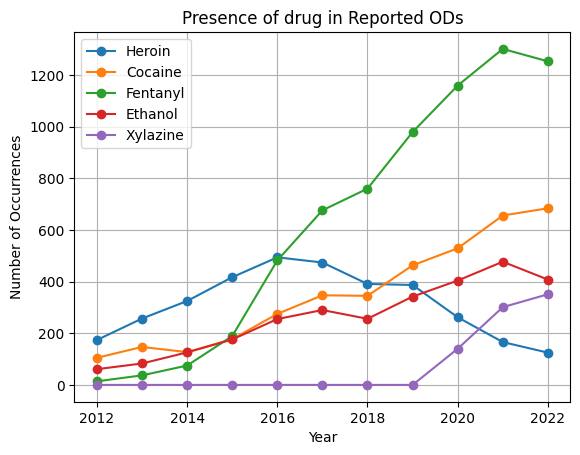

,Year,Heroin,Cocaine,Fentanyl,Ethanol,Xylazine
0,2012,174,105,14,61,0
1,2013,257,147,37,83,0
2,2014,325,127,75,126,0
3,2015,417,177,189,176,0
4,2016,494,275,482,255,0
5,2017,474,347,676,290,0
6,2018,391,345,760,256,0
7,2019,387,463,979,342,0
8,2020,262,529,1159,404,140
9,2021,166,656,1301,477,301


In [7]:
#Line graph showing the how many times a drug was present in a reported OD.
columns_to_plot = ["Heroin", "Cocaine", "Fentanyl", "Ethanol", "Xylazine"]
df_summed = df_rows.groupby('Year')[columns_to_plot].sum().reset_index()



# Plotting
for drug in columns_to_plot:
    plt.plot(df_summed['Year'], df_summed[drug], marker='o', label=drug)

plt.title('Presence of drug in Reported ODs')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.grid(True)
plt.show()

df_summed

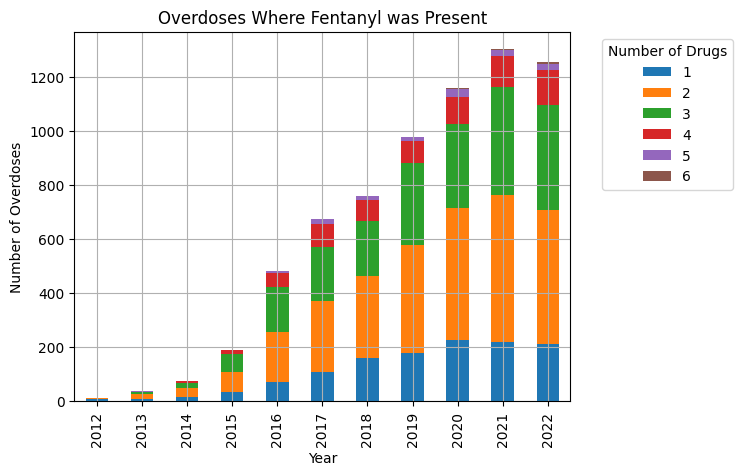

In [8]:
# Group by year and total number of drugs, then count the number of overdoses for heroin
fentanyl_overdoses = df_rows.groupby(['Year', 'Number of Drugs Taken'])['Fentanyl'].sum().unstack(fill_value=0)

# Plotting
fentanyl_overdoses.plot(kind='bar', stacked=True)
plt.title('Overdoses Where Fentanyl was Present')
plt.xlabel('Year')
plt.ylabel('Number of Overdoses')
plt.legend(title='Number of Drugs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

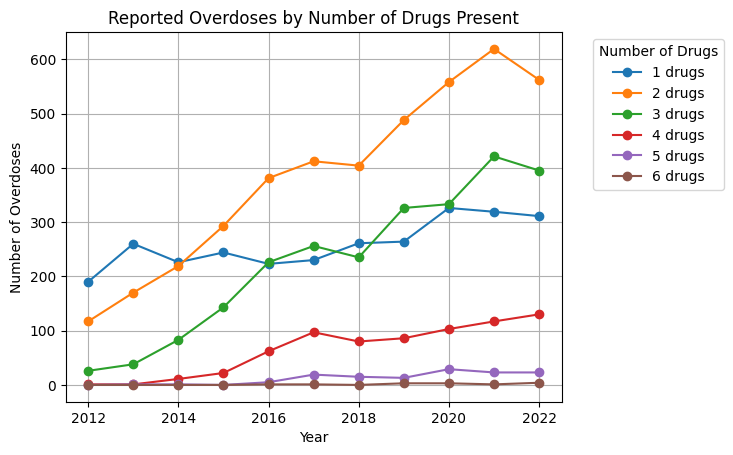

In [9]:
# Group by year and total number of drugs, then count the number of overdoses
overdoses_by_year = df_rows.groupby(['Year', 'Number of Drugs Taken']).size().unstack(fill_value=0)

# Plotting
for drugs in overdoses_by_year.columns:
    plt.plot(overdoses_by_year.index, overdoses_by_year[drugs], marker='o', label=f'{drugs} drugs')

plt.title('Reported Overdoses by Number of Drugs Present')
plt.xlabel('Year')
plt.ylabel('Number of Overdoses')
plt.legend(title='Number of Drugs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

R-squared: 0.9610238658084308


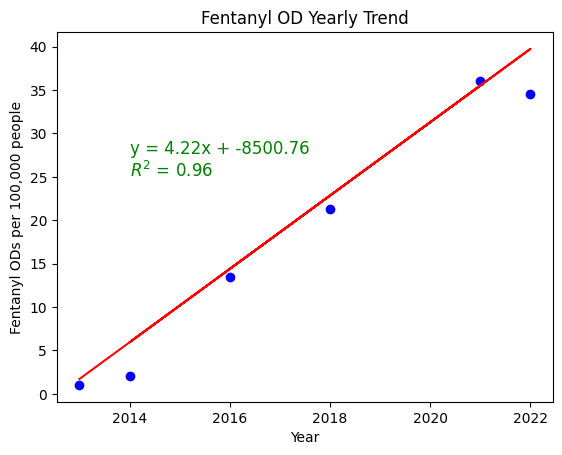

In [32]:
#Add necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Create the data frame
df_regression = df_summed.filter(['Year', 'Fentanyl'])
df_regression['Population of Connecticut'] = [3595000, 3596000, 3596000, 3589000, 3580000, 3575000, 3575000, 3566000, 3557000, 3606000, 3626000]
df_regression['Fentanyl ODs per 100,000 people'] = 100000 * df_regression['Fentanyl']/df_regression['Population of Connecticut']

#Create and train the model
X = df_regression[['Year']]
y = df_regression['Fentanyl ODs per 100,000 people']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate R^2
r_squared = r2_score(y_test, y_pred)

# Plotting
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Fentanyl OD Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Fentanyl ODs per 100,000 people')
plt.text(2014, 25, f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2$ = {r_squared:.2f}', fontsize=12, color='green')
plt.show()